In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
corr_matrix = df_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df_train["Embarked"] = df_train["Embarked"].fillna("S")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

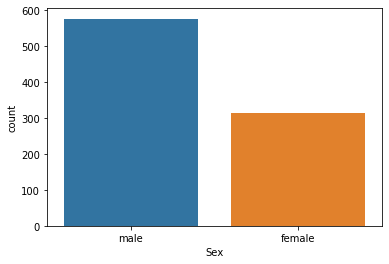

In [9]:
sns.countplot(df_train['Sex'])

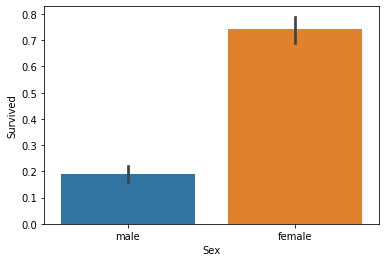

In [11]:
sns.barplot(
    data = df_train,
    x ='Sex',
    y ='Survived'  
)
plt.show()

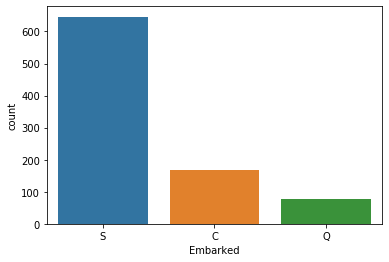

In [12]:
sns.countplot(df_train['Embarked'])

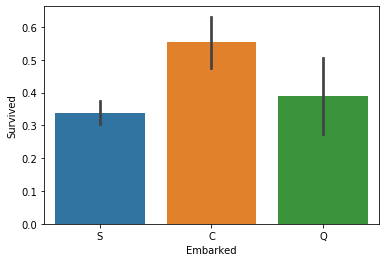

In [13]:
sns.barplot(
    data = df_train,
    x = 'Embarked',
    y = 'Survived',
    
)
plt.show()

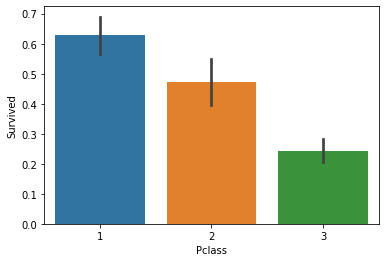

In [14]:
sns.barplot(
    data = df_train,
    x ='Pclass',
    y ='Survived'  
)
plt.show()

# Data preparation

In [15]:
q = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Parch', 'Age']
df_train_set = df_train.drop(q, axis=1)
df_train_set.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,male,7.2500,S
1,1,1,female,71.2833,C
2,1,3,female,7.9250,S
3,1,1,female,53.1000,S
4,0,3,male,8.0500,S


In [16]:
z = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age']
df_test_set = df_test.drop(z, axis=1)
df_test_set.head()

,PassengerId,Pclass,Sex,Fare,Embarked
0,892,3,male,7.8292,Q
1,893,3,female,7.0000,S
2,894,2,male,9.6875,Q
3,895,3,male,8.6625,S
4,896,3,female,12.2875,S


In [17]:
mean = df_test_set["Fare"].mean()
df_test_set["Fare"] = df_test_set["Fare"].fillna(mean)
df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 16.4+ KB


In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df_train_set.iloc[:, 2] = labelencoder.fit_transform(df_train_set.iloc[:, 2].values)
df_train_set.iloc[:, 4] = labelencoder.fit_transform(df_train_set.iloc[:, 4].values)

df_test_set.iloc[:, 2] = labelencoder.fit_transform(df_test_set.iloc[:, 2].values)
df_test_set.iloc[:, 4] = labelencoder.fit_transform(df_test_set.iloc[:, 4].values)

In [19]:
df_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Fare        891 non-null float64
Embarked    891 non-null int32
dtypes: float64(1), int32(2), int64(2)
memory usage: 27.9 KB


In [20]:
df_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Fare           418 non-null float64
Embarked       418 non-null int32
dtypes: float64(1), int32(2), int64(2)
memory usage: 13.1 KB


# Train data split

In [22]:
X = df_train_set.iloc[:, 1:5].values
Y = df_train_set.iloc[:, 0].values


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4, random_state=4)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(534, 4)
(357, 4)
(534,)
(357,)


# KNN model

In [25]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [27]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
print(scores)    

[0.7675070028011205, 0.7619047619047619, 0.7703081232492998, 0.7647058823529411, 0.7310924369747899, 0.7226890756302521, 0.7282913165266106, 0.7507002801120448, 0.7282913165266106, 0.7394957983193278, 0.7394957983193278, 0.7366946778711485, 0.7086834733893558, 0.7226890756302521, 0.711484593837535, 0.7086834733893558, 0.7142857142857143, 0.7310924369747899, 0.7366946778711485, 0.7366946778711485, 0.7310924369747899, 0.7338935574229691, 0.7282913165266106, 0.7226890756302521, 0.7058823529411765]


Text(0, 0.5, 'Testing Accuracy')

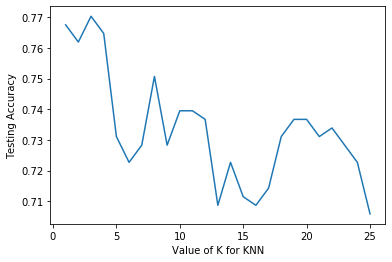

In [28]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7703081232492998


# Making predictions on out-of-sample data

In [30]:
test = df_test_set.iloc[:, 1:5].values

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,Y)
Y_pred = knn.predict(test)

submission = pd.DataFrame({
     "PassengerId": df_test_set["PassengerId"],
     "Survived": Y_pred
 })

In [32]:
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,1
8,900,1
9,901,0
